In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/brain_dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/brain_dataset/yes/Y14.jpg
/content/drive/MyDrive/brain_dataset/yes/Y104.jpg
/content/drive/MyDrive/brain_dataset/yes/Y120.JPG
/content/drive/MyDrive/brain_dataset/yes/Y111.JPG
/content/drive/MyDrive/brain_dataset/yes/Y20.jpg
/content/drive/MyDrive/brain_dataset/yes/Y147.JPG
/content/drive/MyDrive/brain_dataset/yes/Y192.JPG
/content/drive/MyDrive/brain_dataset/yes/Y114.JPG
/content/drive/MyDrive/brain_dataset/yes/Y187.jpg
/content/drive/MyDrive/brain_dataset/yes/Y161.JPG
/content/drive/MyDrive/brain_dataset/yes/Y12.jpg
/content/drive/MyDrive/brain_dataset/yes/Y170.JPG
/content/drive/MyDrive/brain_dataset/yes/Y1.jpg
/content/drive/MyDrive/brain_dataset/yes/Y167.JPG
/content/drive/MyDrive/brain_dataset/yes/Y2.jpg
/content/drive/MyDrive/brain_dataset/yes/Y22.jpg
/content/drive/MyDrive/brain_dataset/yes/Y180.jpg
/content/drive/MyDrive/brain_dataset/yes/Y117.JPG
/content/drive/MyDrive/brain_dataset/yes/Y108.jpg
/content/drive/MyDrive/brain_dataset/yes/Y182.JPG
/content

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

In [4]:
all_data_dir = '/content/drive/MyDrive/brain_dataset/'

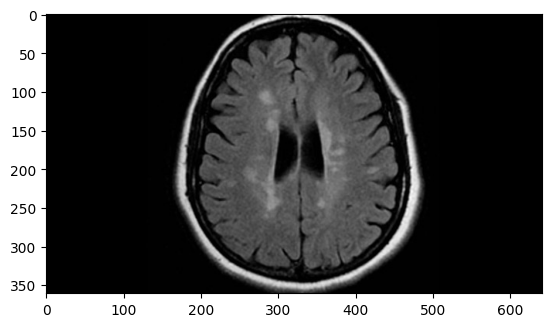

In [5]:
img = mpimg.imread("/content/drive/MyDrive/brain_dataset/no/no 8.jpg")
plt.imshow(img)

In [6]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [7]:
img.shape

(361, 642, 3)

In [8]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (251, 201, 3)


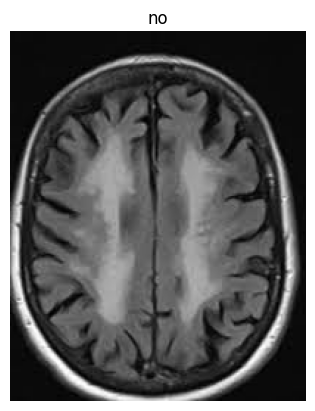

In [9]:
img_no = view_random_image(target_dir="/content/drive/MyDrive/brain_dataset/",
                        target_class="no")

Image shape: (325, 300)


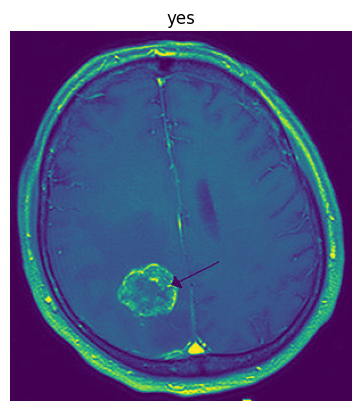

In [10]:
img_no = view_random_image(target_dir="/content/drive/MyDrive/brain_dataset/",
                        target_class="yes")

In [11]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [12]:
train_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [13]:
test_data

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

In [15]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [16]:
model_history = model.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 53s 5s/step - loss: 0.9102 - accuracy: 0.6877 - val_loss: 0.7165 - val_accuracy: 0.6996
Epoch 2/50
8/8 [==============================] - 10s 1s/step - loss: 0.5778 - accuracy: 0.7668 - val_loss: 0.5028 - val_accuracy: 0.7549
Epoch 3/50
8/8 [==============================] - 7s 877ms/step - loss: 0.5053 - accuracy: 0.7628 - val_loss: 0.4819 - val_accuracy: 0.7787
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 0.4800 - accuracy: 0.8024 - val_loss: 0.4416 - val_accuracy: 0.7905
Epoch 5/50
8/8 [==============================] - 7s 916ms/step - loss: 0.4515 - accuracy: 0.8024 - val_loss: 0.4087 - val_accuracy: 0.8261
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.3742 - accuracy: 0.8498 - val_loss: 0.3901 - val_accuracy: 0.8577
Epoch 7/50
8/8 [==============================] - 7s 979ms/step - loss: 0.5073 - accuracy: 0.7510 - val_loss: 0.4322 - val_accuracy: 0.7866
Epoch 8/50
8/8 [==============

In [17]:
model.evaluate(test_data)

8/8 [==============================] - 3s 407ms/step - loss: 0.0392 - accuracy: 0.9802


[0.03923119604587555, 0.9802371263504028]

<Axes: >

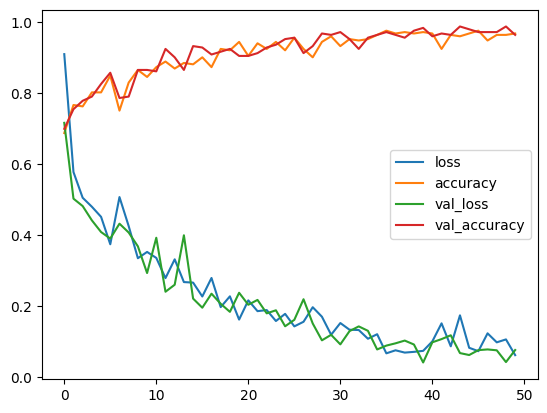

In [18]:
pd.DataFrame(model_history.history).plot()

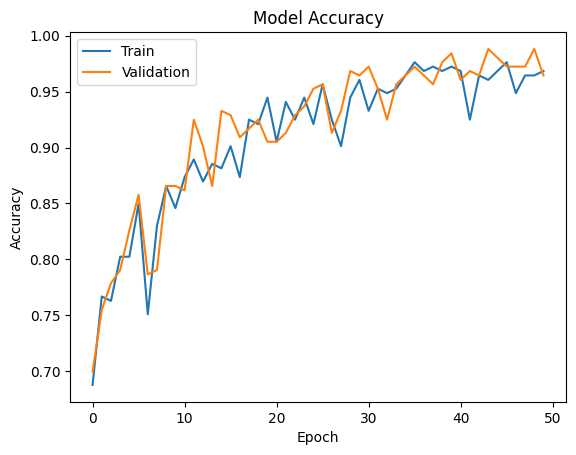

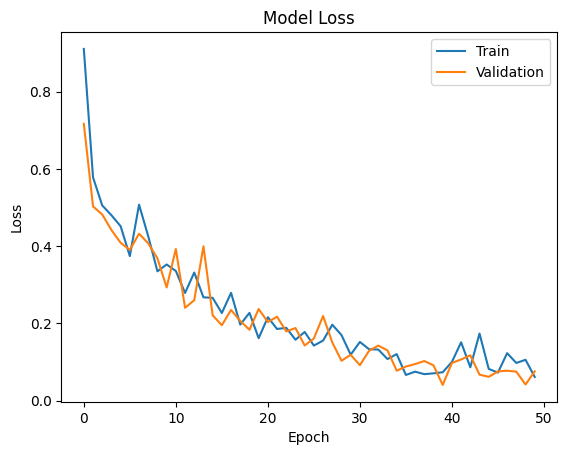

In [19]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [20]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

# Model 2
model2 = Sequential([
  Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation="relu"),
  MaxPooling2D(pool_size=2, padding="valid"),
  Flatten(),
  Dense(256, activation="relu"),
  Dense(128, activation="relu"),
  Dense(1, activation="sigmoid")
])

model2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model2_history = model2.fit(train_data,
                            epochs=50,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data)

model2.evaluate(test_data)

Epoch 1/50
8/8 [==============================] - 10s 929ms/step - loss: 3.5330 - accuracy: 0.5968 - val_loss: 0.6038 - val_accuracy: 0.6126
Epoch 2/50
8/8 [==============================] - 10s 1s/step - loss: 0.6351 - accuracy: 0.7312 - val_loss: 0.6197 - val_accuracy: 0.7431
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 0.5558 - accuracy: 0.7549 - val_loss: 0.5104 - val_accuracy: 0.7826
Epoch 4/50
8/8 [==============================] - 8s 983ms/step - loss: 0.5164 - accuracy: 0.7628 - val_loss: 0.4650 - val_accuracy: 0.8024
Epoch 5/50
8/8 [==============================] - 8s 999ms/step - loss: 0.5112 - accuracy: 0.7826 - val_loss: 0.4825 - val_accuracy: 0.8024
Epoch 6/50
8/8 [==============================] - 7s 914ms/step - loss: 0.4787 - accuracy: 0.7905 - val_loss: 0.4494 - val_accuracy: 0.8063
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 0.4052 - accuracy: 0.8340 - val_loss: 0.4063 - val_accuracy: 0.8379
Epoch 8/50
8/8 [===========

[0.08221128582954407, 0.9525691866874695]

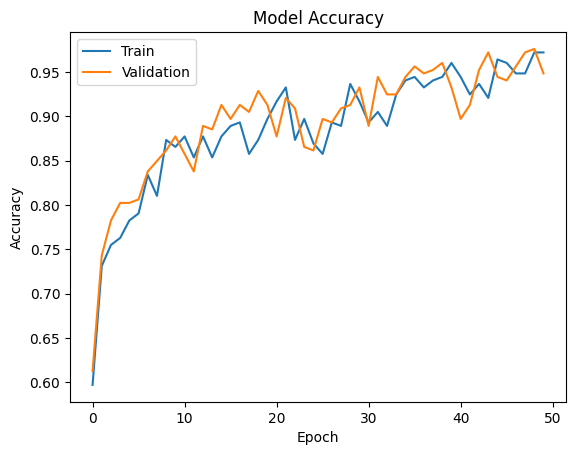

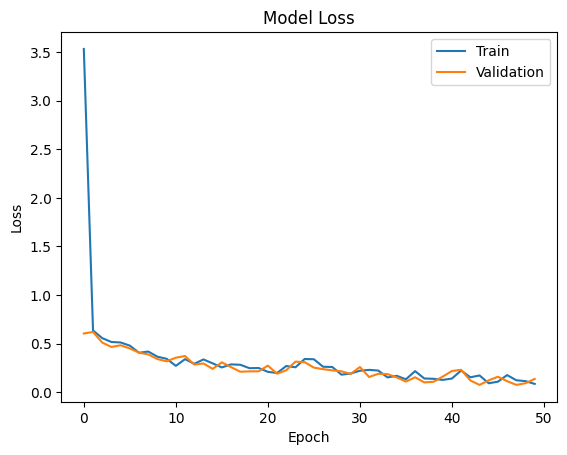

In [21]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [22]:
# Model 3
model3 = Sequential([
  Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation="relu"),
  MaxPooling2D(pool_size=2, padding="valid"),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  Flatten(),
  Dense(256, activation="relu"),
  Dense(128, activation="relu"),
  Dense(128, activation="relu"),
  Dense(1, activation="sigmoid")
])

model3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model3_history = model3.fit(train_data,
                            epochs=50,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data)

model3.evaluate(test_data)

Epoch 1/50
8/8 [==============================] - 11s 1s/step - loss: 0.7416 - accuracy: 0.6008 - val_loss: 0.6439 - val_accuracy: 0.7273
Epoch 2/50
8/8 [==============================] - 7s 894ms/step - loss: 0.5852 - accuracy: 0.7708 - val_loss: 0.5028 - val_accuracy: 0.7945
Epoch 3/50
8/8 [==============================] - 8s 1s/step - loss: 0.4838 - accuracy: 0.7549 - val_loss: 0.5160 - val_accuracy: 0.7589
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 0.4853 - accuracy: 0.7826 - val_loss: 0.4514 - val_accuracy: 0.7945
Epoch 5/50
8/8 [==============================] - 8s 946ms/step - loss: 0.4854 - accuracy: 0.7945 - val_loss: 0.4348 - val_accuracy: 0.8142
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.4786 - accuracy: 0.7905 - val_loss: 0.4116 - val_accuracy: 0.8261
Epoch 7/50
8/8 [==============================] - 7s 935ms/step - loss: 0.4387 - accuracy: 0.7984 - val_loss: 0.4513 - val_accuracy: 0.8103
Epoch 8/50
8/8 [===============

[0.03953225910663605, 0.9841897487640381]

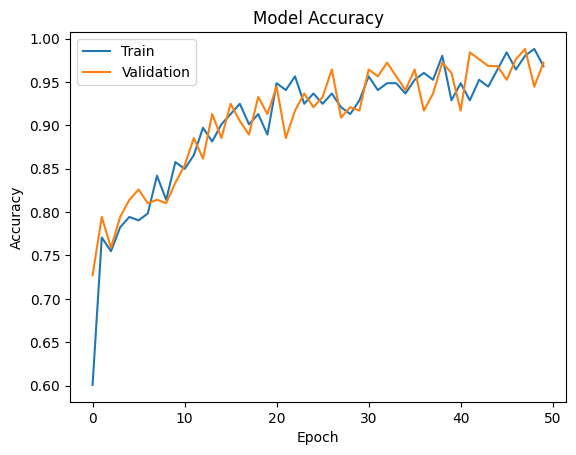

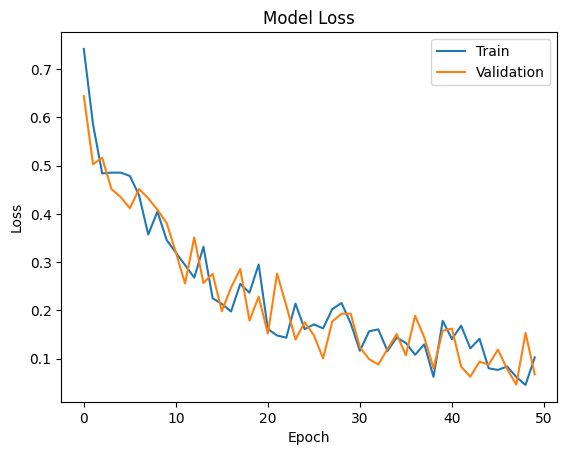

In [30]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(model3_history.history['loss'])
plt.plot(model3_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [24]:
# Model 4
model4 = Sequential([
  Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPooling2D(pool_size=2),
  Flatten(),
  Dense(256, activation="relu"),
  Dense(128, activation="relu"),
  Dense(256, activation="relu"),
  Dense(1, activation="sigmoid")
])

model4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model4_history = model4.fit(train_data,
                            epochs=50,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data)

model4.evaluate(test_data)

Epoch 1/50
8/8 [==============================] - 13s 1s/step - loss: 2.5890 - accuracy: 0.5968 - val_loss: 0.6357 - val_accuracy: 0.6561
Epoch 2/50
8/8 [==============================] - 7s 905ms/step - loss: 0.5735 - accuracy: 0.7233 - val_loss: 0.5183 - val_accuracy: 0.7747
Epoch 3/50
8/8 [==============================] - 8s 1s/step - loss: 0.5290 - accuracy: 0.7708 - val_loss: 0.4901 - val_accuracy: 0.7787
Epoch 4/50
8/8 [==============================] - 7s 920ms/step - loss: 0.5045 - accuracy: 0.7905 - val_loss: 0.5086 - val_accuracy: 0.7470
Epoch 5/50
8/8 [==============================] - 8s 954ms/step - loss: 0.4915 - accuracy: 0.7826 - val_loss: 0.4524 - val_accuracy: 0.8024
Epoch 6/50
8/8 [==============================] - 9s 1s/step - loss: 0.4410 - accuracy: 0.7945 - val_loss: 0.4093 - val_accuracy: 0.8221
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 0.4124 - accuracy: 0.8182 - val_loss: 0.6388 - val_accuracy: 0.6443
Epoch 8/50
8/8 [===============

[0.2372433990240097, 0.9011857509613037]

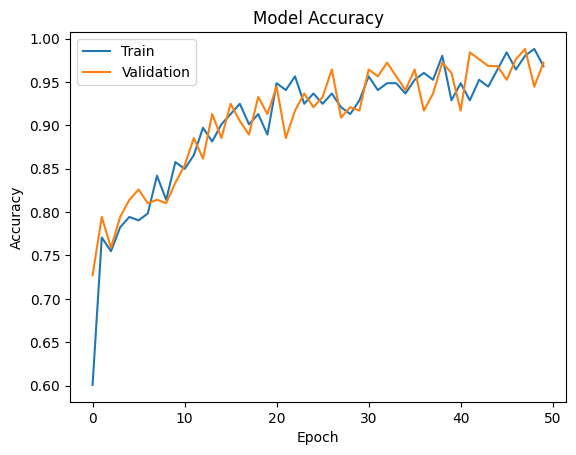

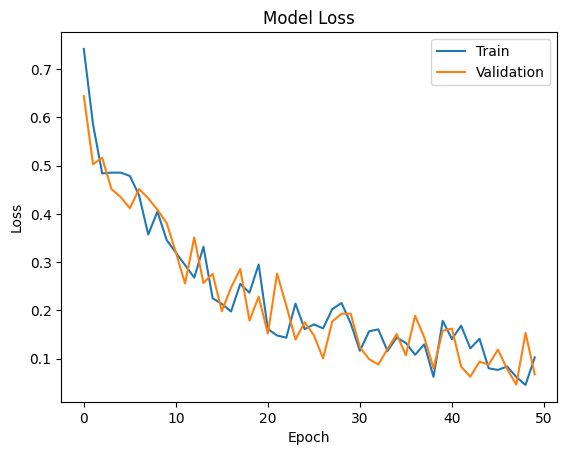

In [25]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(model4_history.history['accuracy'])
plt.plot(model4_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(model4_history.history['loss'])
plt.plot(model4_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [26]:
# Model 5
model5 = Sequential([
  Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  MaxPooling2D(pool_size=2, padding="valid"),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  Flatten(),
  Dense(256, activation="relu"),
  Dense(128, activation="relu"),
  Dense(256, activation="relu"),
  Dense(1, activation="sigmoid")
])

model5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model5_history = model5.fit(train_data,
                            epochs=50,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data)

model5.evaluate(test_data)

Epoch 1/50
8/8 [==============================] - 12s 1s/step - loss: 1.2312 - accuracy: 0.5652 - val_loss: 0.6207 - val_accuracy: 0.7826
Epoch 2/50
8/8 [==============================] - 7s 894ms/step - loss: 0.5837 - accuracy: 0.7036 - val_loss: 0.4975 - val_accuracy: 0.7787
Epoch 3/50
8/8 [==============================] - 8s 1s/step - loss: 0.5245 - accuracy: 0.7589 - val_loss: 0.4813 - val_accuracy: 0.7549
Epoch 4/50
8/8 [==============================] - 12s 2s/step - loss: 0.4910 - accuracy: 0.7787 - val_loss: 0.4319 - val_accuracy: 0.8300
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 0.4885 - accuracy: 0.7431 - val_loss: 0.4431 - val_accuracy: 0.7905
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.4723 - accuracy: 0.7866 - val_loss: 0.4419 - val_accuracy: 0.7628
Epoch 7/50
8/8 [==============================] - 10s 1s/step - loss: 0.4217 - accuracy: 0.8103 - val_loss: 0.4030 - val_accuracy: 0.8419
Epoch 8/50
8/8 [===================

[0.07671485841274261, 0.9762845635414124]

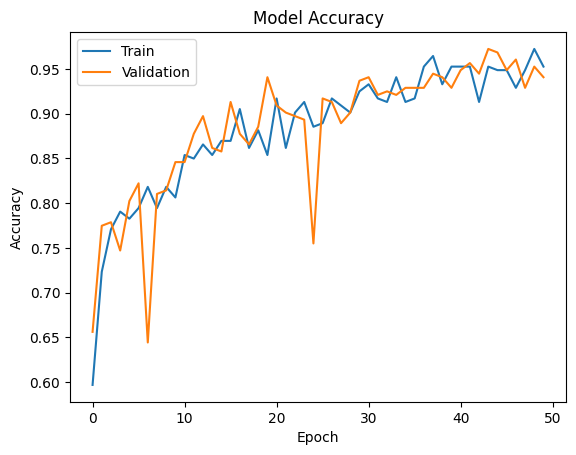

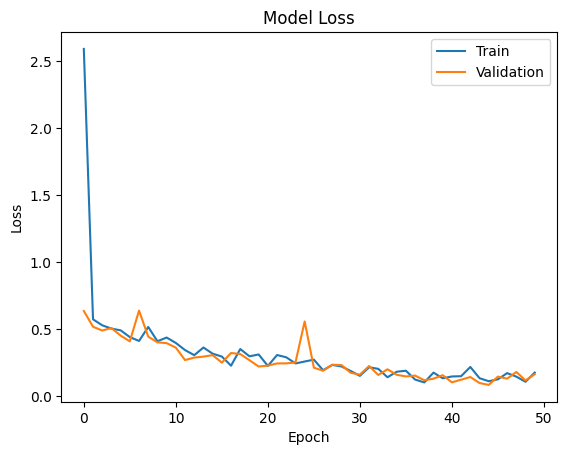

In [27]:
# Plotting accuracy
plt.plot(model5_history.history['accuracy'])
plt.plot(model5_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(model5_history.history['loss'])
plt.plot(model5_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
# Model 6
model6 = Sequential([
  Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation="relu"),
  MaxPooling2D(pool_size=2, padding="valid"),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPooling2D(pool_size=2),
  Conv2D(64, 3, activation="relu"),
  Conv2D(64, 3, activation="relu"),
  MaxPooling2D(pool_size=2),
  Flatten(),
  Dense(512, activation="relu"),
  Dense(256, activation="relu"),
  Dense(128, activation="relu"),
  Dense(1, activation="sigmoid")
])

model6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model6_history = model6.fit(train_data,
                            epochs=50,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data)

model6.evaluate(test_data)

Epoch 1/50
8/8 [==============================] - 12s 968ms/step - loss: 0.7074 - accuracy: 0.5613 - val_loss: 0.6357 - val_accuracy: 0.7668
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 0.6537 - accuracy: 0.6680 - val_loss: 0.6622 - val_accuracy: 0.6522
Epoch 3/50
8/8 [==============================] - 7s 898ms/step - loss: 0.6213 - accuracy: 0.7312 - val_loss: 0.5256 - val_accuracy: 0.7628
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 0.5394 - accuracy: 0.7628 - val_loss: 0.5522 - val_accuracy: 0.7668
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 0.5323 - accuracy: 0.7549 - val_loss: 0.4888 - val_accuracy: 0.7747
Epoch 6/50
8/8 [==============================] - 7s 883ms/step - loss: 0.4800 - accuracy: 0.7866 - val_loss: 0.5184 - val_accuracy: 0.7589
Epoch 7/50
8/8 [==============================] - 8s 1s/step - loss: 0.6089 - accuracy: 0.7352 - val_loss: 0.5064 - val_accuracy: 0.7866
Epoch 8/50
8/8 [===============

[0.06347225606441498, 0.9762845635414124]

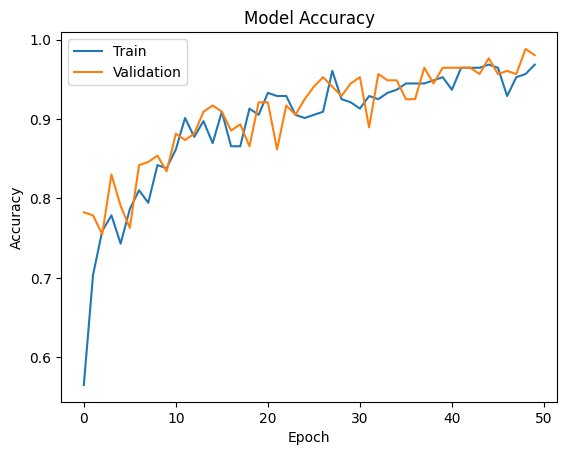

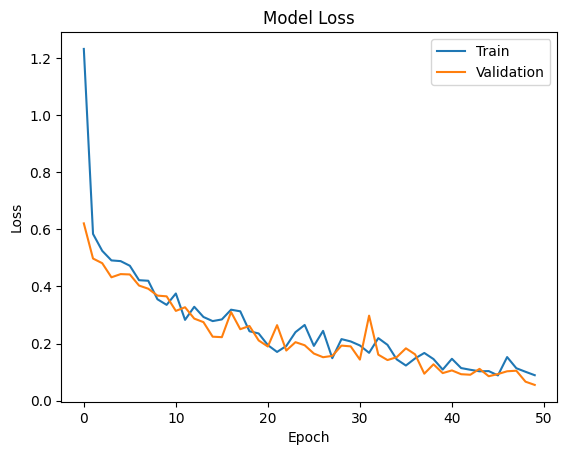

In [29]:
# Plotting accuracy
plt.plot(model6_history.history['accuracy'])
plt.plot(model6_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(model6_history.history['loss'])
plt.plot(model6_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()